# Section 1.4

## Intermediate Problems

For these problems, you will be given a system and a property that the system does not satisfy, but must discover for yourself an input or pair of input signals to base your argument upon. Again, create numpy arrays to represent the inputs and outputs of the system and generate appropriate plots with these arrays. Use your plots to make a clear and concise argument about why the system does not satisfy the specified property.

In [1]:
# Import numpy and pyplot from matplotlib
import numpy as np
from matplotlib import pyplot as plt

### (d).

(d). The system given in Part (a) is not invertible. The system in part a is $y[n]=\sin((\pi/2)x[n])$

To solve this we must understand that an invertible system is one that creates distinct outputs for distinct inputs. So if I can find two distinct inputs that give the same output, this proves that the system is not invertible. Since the system in part a is periodic, there are an infinite number of inputs that produce the same output.

sin is periodic with a period of 2*pi



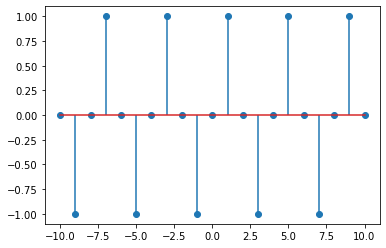

In [3]:
n = np.arange(-10, 11)
xn = n
yn = np.sin(np.pi / 2 * xn)

plt.stem(xn, yn)
plt.show()

It is easy to see that every even input produces a value of zero so we are going to change x[n] to be 2 * n. Just to drive home that this is definitely not invertible.

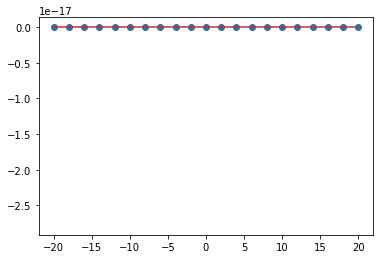

In [3]:
n = np.arange(-10, 11)
xn = 2 * n
yn = np.sin(np.pi / 2 * xn)
# because of floating point rounding error I am using np.isclose to see if the values are all close to 0. 
# If they are close to zero then I just set them to zero.
yn = [0 if np.isclose(0, val) else val for val in yn]

plt.stem(xn, yn)
plt.show()

So this system is not invertible because there is an infinite number of inputs that produce the same output value.

## Advanced Problems

For each of the following systems, state whether or not the system is linear, time-invariant, causal, stable, and invertible. For each property you claim the system does not possess, construct a counter-argument using Python to demonstrate how the system violates the property in question.

### (e). $y[n] = x^3[n]$

This system is time-invariant, Causal, Stable, and Invertible. It is not Linear.

#### Linearity Counter Example

First, define a first input signal, $x_1[n]$, over some interval and display the output of the system to that input. This output is $y_1[n]$.

Second, define a second input signal, $x_2[n]$ over the same interval and display the output of the system to that input. This output is $y_2[n]$.

Third, define a third input signal, $x_3[n]=x_1[n]+x_2[n]$ and display the output of the system to that input. This output is $y_3[n]$.

Fourth, define a fourth output as a linear combination of the the outputs in the first and second steps, combined in the same way as the inputs were combined to form the third input. i.e $y_4[n]=y_1[n]+y_2[n]$

Last, compare $y_3[n]$ to $y_4[n]$. If they are not equal, the system is not linear.

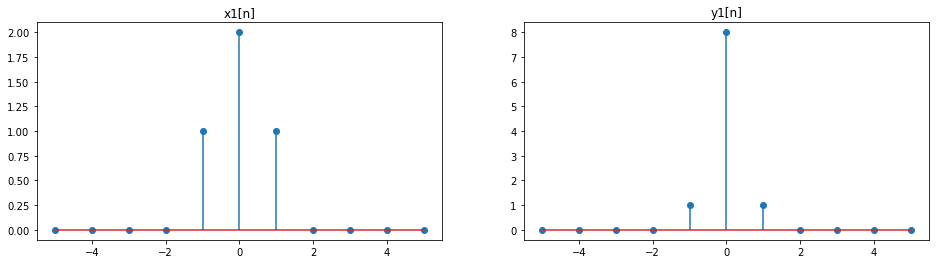

In [31]:
## First
# Definition of x1[n]
n = np.arange(-5, 6)
x1n = np.array([0,0,0,0,1,2,1,0,0,0,0])

# Calculating the system response to the input
y1n = np.power(x1n, 3)

# Plotting input and output
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, x1n)
plt.title('x1[n]')
plt.subplot(1,2,2)
plt.stem(n, y1n)
plt.title('y1[n]')
plt.show()

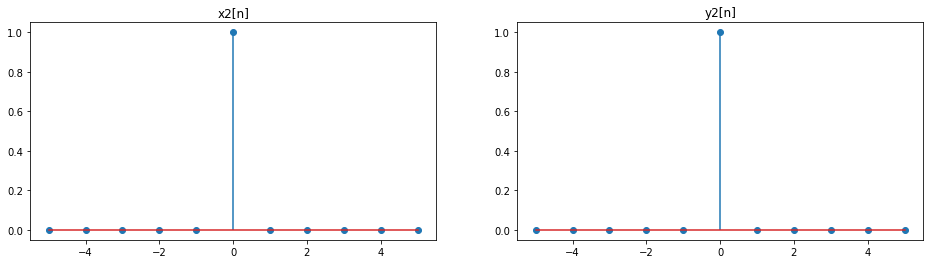

In [32]:
## Second
# Definition of x2[n]. Just an impulse
x2n = np.array([0,0,0,0,0,1,0,0,0,0,0])

# Calculating the response to the second input
y2n = np.power(x2n, 3)

# Plotting the second input and the second output
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, x2n)
plt.title('x2[n]')
plt.subplot(1,2,2)
plt.stem(n, y2n)
plt.title('y2[n]')
plt.show()

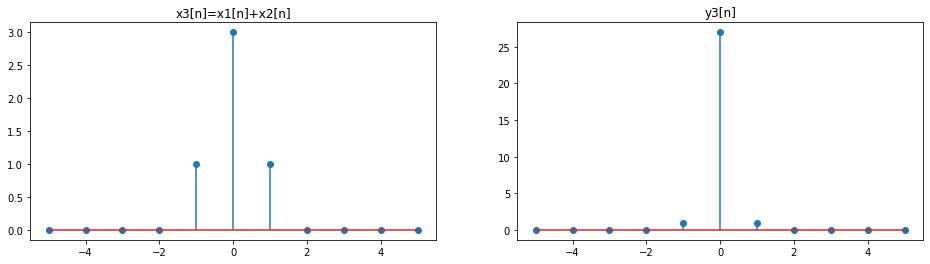

In [33]:
## Third
# Defining a third input as a linear combination of other inputs
x3n = x1n + x2n

# Calculating the Output of the system to this third input
y3n = np.power(x3n, 3)

# Plotting the third input and the third output
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, x3n)
plt.title('x3[n]=x1[n]+x2[n]')
plt.subplot(1,2,2)
plt.stem(n, y3n)
plt.title('y3[n]')
plt.show()

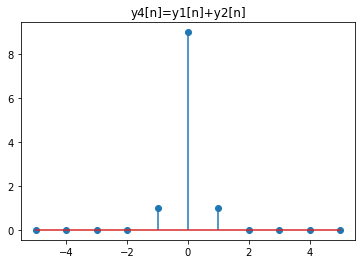

In [8]:
## Fourth
# Calculating what the output would be if we combined y1[n] and y2[n] in the same way we combined x1[n] and x2[n] to form x3[n].
y4n = y1n + y2n

# Plotting the linear combination of outputs
plt.stem(n, y4n)
plt.title('y4[n]=y1[n]+y2[n]')
plt.show()

Last, comparing $y_3[n]$ to $y_4[n]$, we can see that they are not equal, so $y[n]=x^3[n]$ is NOT linear.

### (f). $y[n]=nx[n]$

This system is Linear, Causal, and invertible. It is not Time Invariant or stable.

#### Time Invariance Counter Example

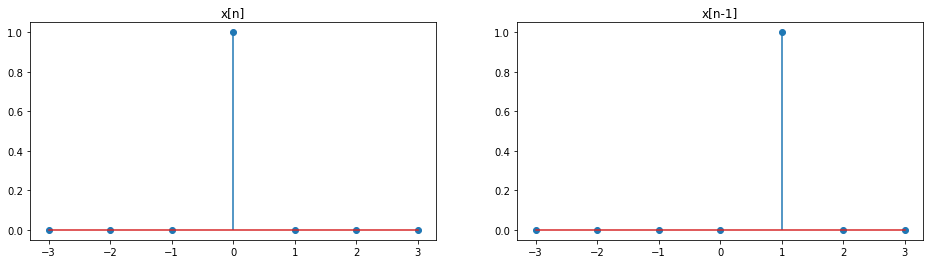

In [30]:
# Define a signal on the interval -3 to 3
n = np.arange(-3, 4)
xn = np.array([0,0,0,1,0,0,0]) # Impulse

# Now define a timeshifted version of the same signal
xn_time_shifted = np.array([0,0,0,0,1,0,0])

# Plot the signal and the time shifted version of the signal
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, xn)
plt.title('x[n]')
plt.subplot(1,2,2)
plt.stem(n, xn_time_shifted)
plt.title('x[n-1]')
plt.show()

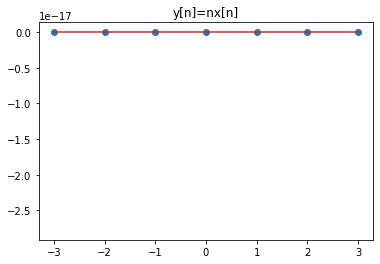

In [24]:
# Compute the response of the system to the signal
yn = n * xn

# Plot the system response to the signal
plt.stem(n, yn)
plt.title('y[n]=nx[n]')
plt.show()

Now I have a signal $x[n]$ and a time shifted signal $x[n-1]$.
I also have a system's response to the non time shifted input $y[n]=nx[n]$. 
Next I need to show that the output to the time shifted input is different from the time shifted output to the standard input.

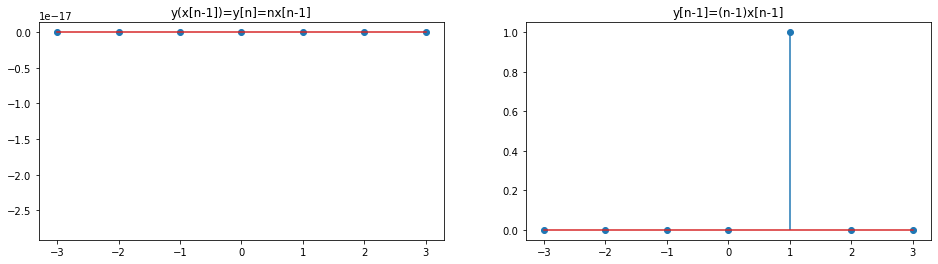

In [26]:
# Shift the output to the non timeshifted input
yn_time_shifted = np.concatenate((np.zeros(1), yn[:-1]))

# Compute the output response to the time shifted input. If the signal were TI, 
# this would equal the time shifted output to the non time shifted input.
yn_of_ts_input = n * xn_time_shifted

# Plot the two outputs that should be equal
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, yn_time_shifted)
plt.title('y(x[n-1])=y[n]=nx[n-1]')
plt.subplot(1,2,2)
plt.stem(n, yn_of_ts_input)
plt.title('y[n-1]=(n-1)x[n-1]')
plt.show()

If the system were time invariant, then the two responses above would be equal. Since they are not, this is a counter example to time invariance for this system.

#### Stability Counter Example

To show that the system $y[n]=nx[n]$ is unstable I will use the input $x[n]=u[n]$. It should be cleare that $u[n]$ is bounded by the values 0 and 1. But it can be seen below (and by inspection) that the system will achieve ever increasing output values for ever increasing n.

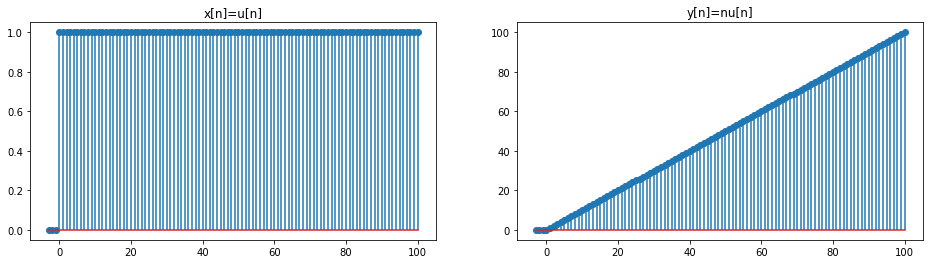

In [29]:
# Define the step function on a sufficiently large interval to see nature of system response
n = np.arange(-3, 101)
xn = np.array([1 if val >= 0 else 0 for val in n]) # u[n] step function

# Calculate the output to the bounded input system
yn = n * xn

# Plot the input signal and the output signal and see how the output increases with increasing n.
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, xn)
plt.title('x[n]=u[n]')
plt.subplot(1,2,2)
plt.stem(n, yn)
plt.title('y[n]=nu[n]')
plt.show()

The output of $y[n]=nu[n]$ will grow with increasing n even though $u[n]$ is bounded at 1 with increasing n. So this system is not stable.

### (g). $y[n]=x[2n]$

This system is Linear and stable. It is not Time-invariant, causal or invertible

#### Time-Invariance Counter Example

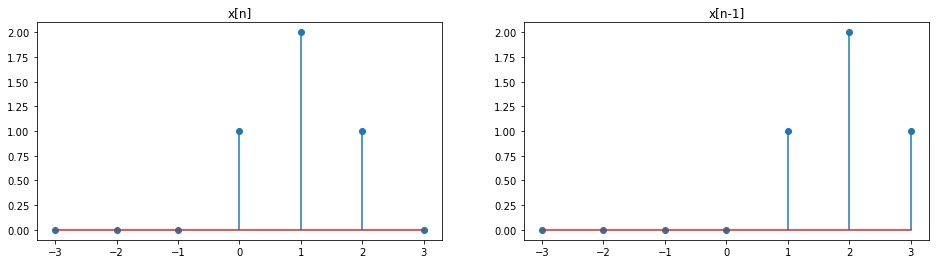

In [5]:
# n for the input will range from -3 to 3
n = np.arange(-3,4)

# x[n] is created 
xn = np.array([0,0,0,1,2,1,0])

# x[n-1] is created
xn_ts = np.array([0,0,0,0,1,2,1])

# Plotting x[n] and x[n-1]
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, xn)
plt.title('x[n]')
plt.subplot(1,2,2)
plt.stem(n, xn_ts)
plt.title('x[n-1]')
plt.show()

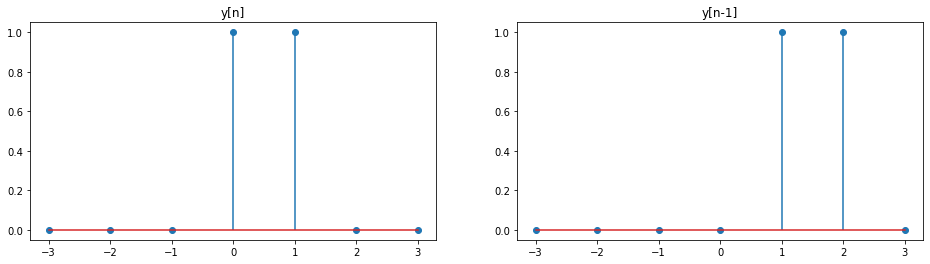

In [6]:
# Padding x[n] so I can take every other value and still end up with a signal of the same size
# This pads x[n] with three zeros on either side
xn_padded = np.pad(xn, (3,3))

# Calculating y[n]=x[2n]
yn = xn_padded[::2]
# Time shifting the output to get y[n-1]
yn_ts = np.concatenate((np.zeros(1),yn[:-1]))

#Plotting y[n] and y[n-1]
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(n, yn)
plt.title('y[n]')
plt.subplot(1,2,2)
plt.stem(n, yn_ts)
plt.title('y[n-1]')
plt.show()

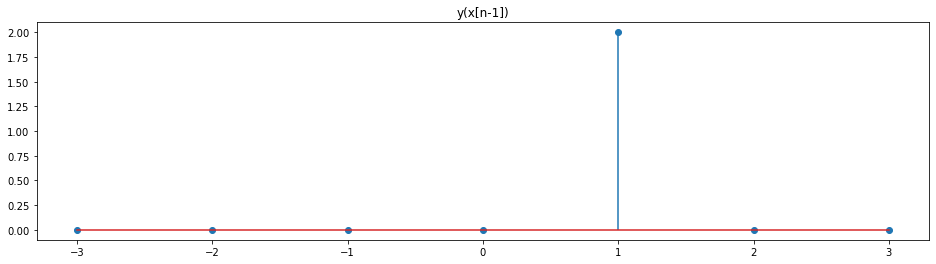

In [7]:
# Padding the time shifted input x[n-1]
xn_ts_padded = np.pad(xn_ts, (3,3))
# Calculating the output using x[n-1]
yn_xn_ts = xn_ts_padded[::2]

# plotting the output using the time shifted input
plt.figure(figsize=(16,4))
plt.stem(n, yn_xn_ts)
plt.title('y(x[n-1])')
plt.show()

If $y[n]$ were Time Invariant, then $y[n-1]$ would be equal to $y(x[n-1])$. Since they are not equal, the system is not time invariant.

#### Causality Counter Example

This can be shown using any $x[n]$  and providing an n value for $y[n]$ that is greater than 0.

For $y[n]=x[2n]$, say $n=1$

$y[1]=x[2*1]$

$y[1]=x[2]$

So you can see that the system at time $n=1$ depends on the input at time $n=2$, which is a future value of the input. So $y[n]$ is not causal.

#### Invertibility Counter Example

The example above for Time-Invariance also works to show that $y[n]$ is not invertible. You can see that all the odd values of the input do not correspond to output values. So, there is no way to recover them once $y[n]$ is computed. So the system is not invertible.